# Fashion MNIST :: PCA, t-SNE and K-Means Clustering with Voronoi Visualization

This notebook demonstrates advanced unsupervised learning and visualization on the Fashion MNIST dataset. It applies principal component analysis (PCA) and t-distributed stochastic neighbor embedding (t-SNE) for dimensionality reduction, followed by k-means clustering to identify inherent structure in the data. Finally, Voronoi diagrams are used to visualize cluster boundaries and enhance interpretability.

**Key highlights:**
- Data preprocessing and feature scaling for image data.
- Dimensionality reduction with PCA and t-SNE for visual exploration.
- K-means clustering to discover patterns in the unlabeled dataset.
- Creative use of Voronoi diagrams for cluster visualization.
- Evaluation of clustering quality and interpretation of results.

This project showcases practical unsupervised learning and inventive visualization techniques for high-dimensional image data.


In [1]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_val, y_val) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

In [ ]:
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)

In [ ]:
X_val_standardized = scaler.transform(X_val)

In [ ]:
print("Training set shape:", X_train_standardized.shape)
print("Validation set shape:", X_val_standardized.shape)

Training set shape: (60000, 784)
Validation set shape: (10000, 784)


2)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_standardized)

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_standardized)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


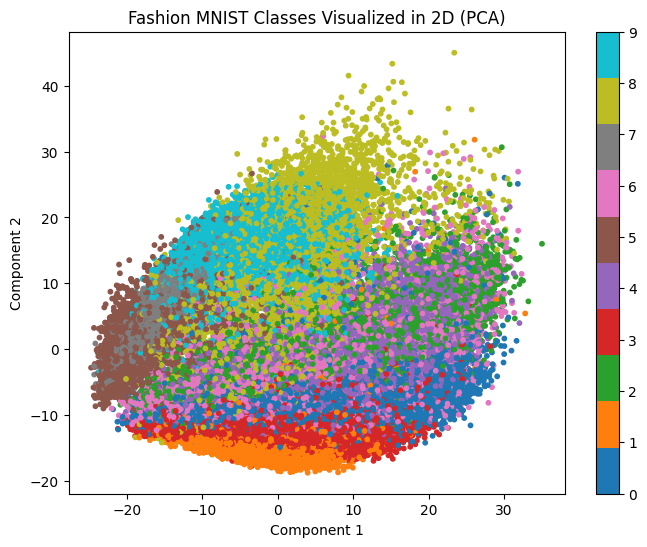

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='tab10', s=10)
plt.colorbar()
plt.title("Fashion MNIST Classes Visualized in 2D (PCA)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

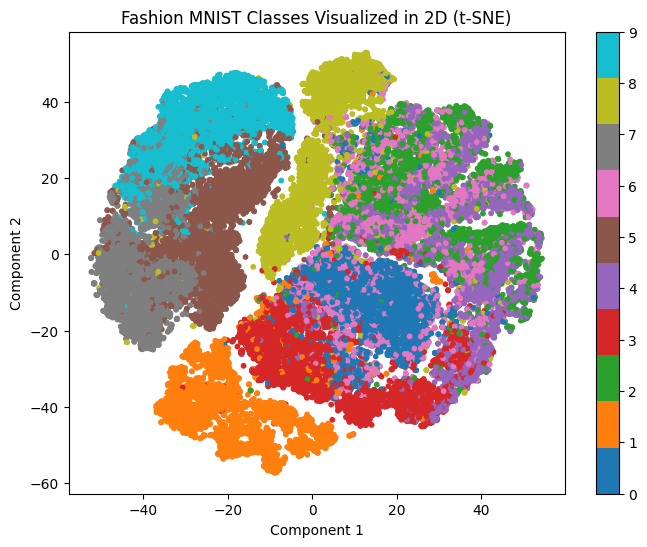

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='tab10', s=10)
plt.colorbar()
plt.title("Fashion MNIST Classes Visualized in 2D (t-SNE)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

3)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans_10 = KMeans(n_clusters=10, random_state=42)
kmeans_20 = KMeans(n_clusters=20, random_state=42)

In [ ]:
kmeans_10.fit(X_train_tsne)
kmeans_20.fit(X_train_tsne)

KMeans(n_clusters=20, random_state=42)

In [ ]:
labels_10 = kmeans_10.labels_
labels_20 = kmeans_20.labels_

4)

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d

In [ ]:
def plot_voronoi(X_reduced, labels, cluster_centers, title):
    plt.figure(figsize=(8, 6))
    vor = Voronoi(cluster_centers)
    voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=1.5, show_points=False)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='tab10', s=10)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

<Figure size 800x600 with 0 Axes>

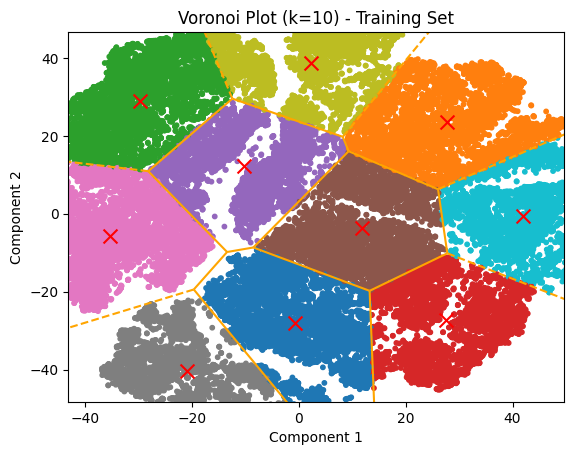

In [ ]:
plot_voronoi(X_train_tsne, labels_10, kmeans_10.cluster_centers_, "Voronoi Plot (k=10) - Training Set")

<Figure size 800x600 with 0 Axes>

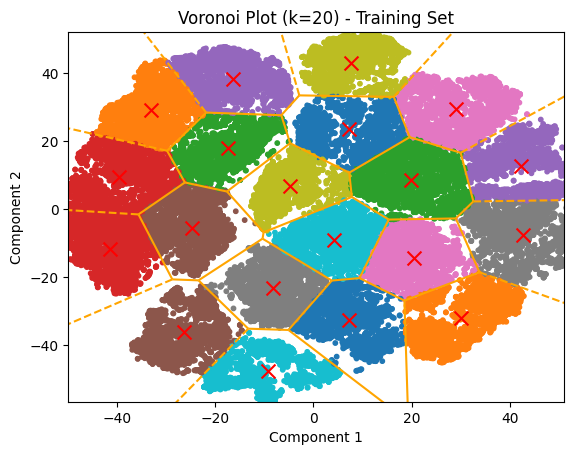

In [ ]:
plot_voronoi(X_train_tsne, labels_20, kmeans_20.cluster_centers_, "Voronoi Plot (k=20) - Training Set")


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


<Figure size 800x600 with 0 Axes>

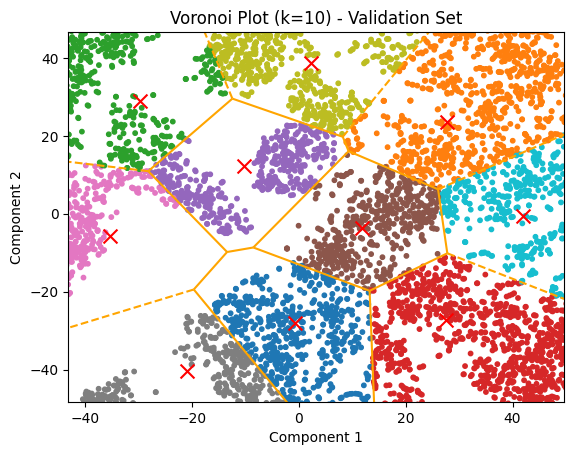

<Figure size 800x600 with 0 Axes>

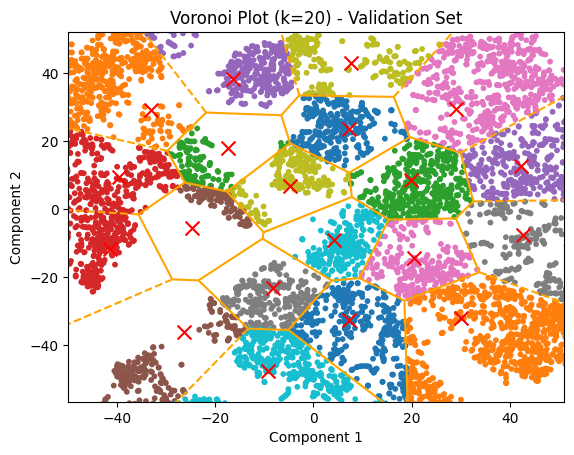

In [ ]:
X_val_tsne = tsne.fit_transform(X_val_standardized)

plot_voronoi(X_val_tsne, kmeans_10.predict(X_val_tsne), kmeans_10.cluster_centers_, "Voronoi Plot (k=10) - Validation Set")
plot_voronoi(X_val_tsne, kmeans_20.predict(X_val_tsne), kmeans_20.cluster_centers_, "Voronoi Plot (k=20) - Validation Set")